#### 1 tweet = document

1) lower case

2) remove stopwords

3) remove stems and lemmas

## Import Packages

In [2]:
import pandas as pd
import numpy as np
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 

import pandas as pd
import numpy as np
pd.options.display.max_columns = 200
pd.options.display.max_rows = 999
import matplotlib.pyplot as plt  

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC  
from time import time
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB


/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Create DataFrame and EDA

In [3]:
df = pd.read_csv('cleaned_all_samples.csv')

In [4]:
print(len(df))
df.head()

243390


,Unnamed: 0,hashtags,label,like_count,reply_count,retweet_count,tweet,cleaned_tweets
0,0,[politics],1,0.0,0.0,0.0,#politics NH gun shop owner gifts Trump semi-a...,NH gun shop owner gifts Trump semi-automatic r...
1,1,"[ISIS, targets, iceisis, opiceisis]",1,0.0,0.0,0.0,RT @CtrlSec: Targeted #ISIS accounts https://t...,Targeted accounts
2,2,[],0,42.0,0.0,9.0,16-year-old environmental activist Greta Thunb...,16-year-old environmental activist Greta Thunb...
3,3,['#moleg'],0,6.0,1.0,1.0,"Thank God for @repdottieb4mo Under her watch,...","Thank God for Under her watch, 110 remains ..."
4,4,[],0,4.0,0.0,0.0,The Rise of Purpose Education: A Recipe for Fu...,The Rise of Purpose Education: A Recipe for Fu...


## Word Tokenize

In [5]:
#import sentence tokenizer
from nltk import sent_tokenize

#import word tokenizer
from nltk import word_tokenize

In [6]:
#this was part of the NLP notebook

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markbrennan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#eda to check for na's

df.isnull().sum()

#NOTE: some tweets became NaN's after they were cleaned, probably insignificant

Unnamed: 0            0
hashtags          10770
label                 0
like_count           96
reply_count          96
retweet_count        96
tweet                 0
cleaned_tweets       74
dtype: int64

In [8]:
#drop the NaN's from cleaned_tweets

df['cleaned_tweets'].dropna(inplace=True)

In [9]:
df.isnull().sum() # checking NaN's again

Unnamed: 0            0
hashtags          10770
label                 0
like_count           96
reply_count          96
retweet_count        96
tweet                 0
cleaned_tweets       74
dtype: int64

## Lowercase and Tokenize the Tweets

In [12]:
#lowercase all the values in the cleaned tweets

df['cleaned_tweets'] = df.cleaned_tweets.astype(str).str.lower()

In [13]:
#tokenize all rows of cleaned tweets

df['tokenized_tweets'] = df['cleaned_tweets'].apply(word_tokenize)

In [14]:
df.head()

,Unnamed: 0,hashtags,label,like_count,reply_count,retweet_count,tweet,cleaned_tweets,tokenized_tweets
0,0,[politics],1,0.0,0.0,0.0,#politics NH gun shop owner gifts Trump semi-a...,nh gun shop owner gifts trump semi-automatic r...,"[nh, gun, shop, owner, gifts, trump, semi-auto..."
1,1,"[ISIS, targets, iceisis, opiceisis]",1,0.0,0.0,0.0,RT @CtrlSec: Targeted #ISIS accounts https://t...,targeted accounts,"[targeted, accounts]"
2,2,[],0,42.0,0.0,9.0,16-year-old environmental activist Greta Thunb...,16-year-old environmental activist greta thunb...,"[16-year-old, environmental, activist, greta, ..."
3,3,['#moleg'],0,6.0,1.0,1.0,"Thank God for @repdottieb4mo Under her watch,...","thank god for under her watch, 110 remains ...","[thank, god, for, under, her, watch, ,, 110, r..."
4,4,[],0,4.0,0.0,0.0,The Rise of Purpose Education: A Recipe for Fu...,the rise of purpose education: a recipe for fu...,"[the, rise, of, purpose, education, :, a, reci..."


## Removing Stop Words

In [15]:
from nltk.corpus import stopwords

In [16]:
my_stopwords = set(stopwords.words('english'))
# my_stopwords

In [17]:
#remove stop words

df['tokenized_tweets'] = df['tokenized_tweets'].apply(lambda x: [item for item in x if item not in my_stopwords])


#### Comparing for stop words

In [19]:
df['cleaned_tweets'][28] # checking for stop words

't-minus 5 days until nyc!'

In [20]:
df['tokenized_tweets'][28] # checking for stop words

['t-minus', '5', 'days', 'nyc', '!']

## Removing Punctuation

In [21]:
import string

In [22]:
punct =[]
punct += list(string.punctuation)
punct += '’'

In [23]:
punct

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '’']

In [24]:
#borrowed code from StackOverFlow

df['tokenized_tweets'] = df['tokenized_tweets'].apply(lambda x: [item for item in x if item not in punct])


#### Compare the cleaned / tokenized columns

In [25]:
df['tweet'][10] #comparing token cleaning

'It’s something that’s been sticking out and definitely bothering me! There’s the narrative that we’re so liberal but 2018 was basically all moderates winning. And then of course the decision as to what’s a sexy storyline and what isn’t. Think votes are what count 🤔'

In [26]:
df['cleaned_tweets'][10] #comparing token cleaning

'it’s something that’s been sticking out and definitely bothering me! there’s the narrative that we’re so liberal but 2018 was basically all moderates winning. and then of course the decision as to what’s a sexy storyline and what isn’t. think votes are what count '

In [27]:
df['tokenized_tweets'][10] #comparing token cleaning

['something',
 'sticking',
 'definitely',
 'bothering',
 'narrative',
 'liberal',
 '2018',
 'basically',
 'moderates',
 'winning',
 'course',
 'decision',
 'sexy',
 'storyline',
 'think',
 'votes',
 'count']

### Convert the tokens back to a string for stems and lemma

In [62]:
#df[dummy] is a dummy column to perform stem and lemma on

df['dummy'] = df['tokenized_tweets'].apply(lambda x: ' '.join(map(str, x)))


In [63]:
df.head() # checking results

,hashtags,label,like_count,reply_count,retweet_count,tweet,cleaned_tweets,tokenized_tweets,lemmatized_tweets,dummy
0,[politics],1,0.0,0.0,0.0,#politics NH gun shop owner gifts Trump semi-a...,nh gun shop owner gifts trump semi-automatic r...,"[nh, gun, shop, owner, gifts, trump, semi-auto...","[nh, gun, shop, owner, gift, trump, semi-autom...",nh gun shop owner gifts trump semi-automatic r...
1,"[ISIS, targets, iceisis, opiceisis]",1,0.0,0.0,0.0,RT @CtrlSec: Targeted #ISIS accounts https://t...,targeted accounts,"[targeted, accounts]","[targeted, account]",targeted accounts
2,[],0,42.0,0.0,9.0,16-year-old environmental activist Greta Thunb...,16-year-old environmental activist greta thunb...,"[16-year-old, environmental, activist, greta, ...","[16-year-old, environmental, activist, greta, ...",16-year-old environmental activist greta thunb...
3,['#moleg'],0,6.0,1.0,1.0,"Thank God for @repdottieb4mo Under her watch,...","thank god for under her watch, 110 remains ...","[thank, god, watch, 110, remains, safe, secure...","[thank, god, watch, 110, remains, safe, secure...",thank god watch 110 remains safe secure leftis...
4,[],0,4.0,0.0,0.0,The Rise of Purpose Education: A Recipe for Fu...,the rise of purpose education: a recipe for fu...,"[rise, purpose, education, recipe, fulfillment...","[rise, purpose, education, recipe, fulfillment...",rise purpose education recipe fulfillment snow...


## Stems and Lemmas

In [3]:
#Import stemmers and lemmatizers

from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 

In [30]:
#instantiating

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer() #more aggressive
regex_stemmer = RegexpStemmer('ing$|s$|e$|able$', min=4)
lemma = WordNetLemmatizer()

In [145]:
# functions to get stems and lemmas

def stem_words(document,stemmer):
    # tokenize the text
    toks = word_tokenize(document)
    wrd_list = []
    # go through the tokens
    for word in toks:
        # stem the tokens
        wrd_list.append(stemmer.stem(word))
    # return them
    return " ".join(wrd_list)


def lem_words(document,lemmer):
    toks = word_tokenize(document)
    wrd_list = []
    for word in toks:
        wrd_list.append(lemmer.lemmatize(word))
    return " ".join(wrd_list)

In [131]:
df['tokenized_tweets'][10]

['something',
 'sticking',
 'definitely',
 'bothering',
 'narrative',
 'liberal',
 '2018',
 'basically',
 'moderates',
 'winning',
 'course',
 'decision',
 'sexy',
 'storyline',
 'think',
 'votes',
 'count']

### combine tokens into a string


In [138]:
#testing a randomy dummy row to see how each stemmer/lemmer performs
dummy = ' '.join(df['tokenized_tweets'][10])

In [139]:
stem_words(dummy, snowball)

'someth stick definit bother narrat liber 2018 basic moder win cours decis sexi storylin think vote count'

In [143]:
stem_words(dummy, lancaster)

'someth stick definit both nar lib 2018 bas mod win cours decid sexy storylin think vot count'

In [144]:
stem_words(dummy, regex_stemmer)

'someth stick definitely bother narrativ liberal 2018 basically moderate winn cours decision sexy storylin think vote count'

In [146]:
lem_words(dummy, lemma)

'something sticking definitely bothering narrative liberal 2018 basically moderate winning course decision sexy storyline think vote count'

### Just testing stuff out now

In [154]:
lemma.lemmatize('friends')

'friend'

In [44]:
list(map(lambda x: lancaster.stem(x), df['tokenized_tweets'][10] ))

['someth',
 'stick',
 'definit',
 'both',
 'nar',
 'lib',
 '2018',
 'bas',
 'mod',
 'win',
 'cours',
 'decid',
 'sexy',
 'storylin',
 'think',
 'vot',
 'count']

In [43]:
df['tokenized_tweets'][10]

['something',
 'sticking',
 'definitely',
 'bothering',
 'narrative',
 'liberal',
 '2018',
 'basically',
 'moderates',
 'winning',
 'course',
 'decision',
 'sexy',
 'storyline',
 'think',
 'votes',
 'count']

In [47]:
' '.join(df['tokenized_tweets'][10])

'something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count'

In [35]:
lemma.lemmatize('consumed')

'consumed'

In [48]:
df.head()

,Unnamed: 0,hashtags,label,like_count,reply_count,retweet_count,tweet,cleaned_tweets,tokenized_tweets
0,0,[politics],1,0.0,0.0,0.0,#politics NH gun shop owner gifts Trump semi-a...,nh gun shop owner gifts trump semi-automatic r...,"[nh, gun, shop, owner, gifts, trump, semi-auto..."
1,1,"[ISIS, targets, iceisis, opiceisis]",1,0.0,0.0,0.0,RT @CtrlSec: Targeted #ISIS accounts https://t...,targeted accounts,"[targeted, accounts]"
2,2,[],0,42.0,0.0,9.0,16-year-old environmental activist Greta Thunb...,16-year-old environmental activist greta thunb...,"[16-year-old, environmental, activist, greta, ..."
3,3,['#moleg'],0,6.0,1.0,1.0,"Thank God for @repdottieb4mo Under her watch,...","thank god for under her watch, 110 remains ...","[thank, god, watch, 110, remains, safe, secure..."
4,4,[],0,4.0,0.0,0.0,The Rise of Purpose Education: A Recipe for Fu...,the rise of purpose education: a recipe for fu...,"[rise, purpose, education, recipe, fulfillment..."


In [52]:
df['lemmatized_tweets'] = df.tokenized_tweets.apply( lambda x: [lemma.lemmatize(word) for word in x] )

In [56]:
df.columns

Index(['hashtags', 'label', 'like_count', 'reply_count', 'retweet_count',
       'tweet', 'cleaned_tweets', 'tokenized_tweets', 'lemmatized_tweets'],
      dtype='object')

In [55]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
' '.join(df['tokenized_tweets'][10])

In [57]:
!pip install spacy

     |████████████████████████████████| 14.0MB 7.9MB/s eta 0:00:01
     |████████████████████████████████| 215kB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 2.9MB 7.1MB/s eta 0:00:01    |█▏                              | 102kB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 8.5MB/s eta 0:00:011
     |████████████████████████████████| 276kB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 6.9MB/s eta 0:00:01     |████████▊                       | 1.1MB 6.9MB/s eta 0:00:01�████████████████████▋    | 3.5MB 6.9MB/s eta 0:00:01


In [5]:
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

In [60]:
!python -m spacy download en

     |████████████████████████████████| 12.0MB 4.4MB/s eta 0:00:01     |█████████████████████████████   | 10.9MB 4.4MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019130 sha256=3414a358a3e3746d13f33c031aaf932566af271b8f8839f1af67d069f723f46e
  Stored in directory: /private/var/folders/kl/24qh6dtx0_q_57crf94h06q80000gn/T/pip-ephem-wheel-cache-b0ys_ors/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/en_core_web_sm
-->
/Users/markbrennan/anaconda3/envs/learn-env/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [61]:
sp = spacy.load('en')

In [71]:
df['dummy'][11]

'favourite conservative members …'

In [72]:
sp(df['dummy'][11])

favourite conservative members …

In [73]:
sp('something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count went')

something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count went

In [77]:
lookups = Lookups()

In [78]:
lemm = Lemmatizer(lookups)

In [79]:
lemm(df['dummy'][10])

TypeError: __call__() missing 1 required positional argument: 'univ_pos'

In [83]:
df.dummy[10]

'something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count'

In [84]:
' '.join([ word.lemma_ for word in sp(df['dummy'][10]) ])

'something stick definitely bother narrative liberal 2018 basically moderate win course decision sexy storyline think vote count'

In [85]:
lemma_lambda = lambda x: ' '.join([ word.lemma_ for word in sp(x)])

In [86]:
df['lemmatized_tweets'] = df.dummy.apply(lemma_lambda)

In [88]:
df.to_csv('all_lemmatized_tweets.csv')

In [93]:
df.lemmatized_tweets[10]

'something stick definitely bother narrative liberal 2018 basically moderate win course decision sexy storyline think vote count'

In [94]:
df.dummy[10]

'something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count'

In [92]:
df[['lemmatized_tweets']].head()

,lemmatized_tweets
0,nh gun shop owner gift trump semi - automatic ...
1,target account
2,16-year - old environmental activist greta thu...
3,thank god watch 110 remain safe secure leftist...
4,rise purpose education recipe fulfillment snow...


In [95]:
df.head()

,hashtags,label,like_count,reply_count,retweet_count,tweet,cleaned_tweets,tokenized_tweets,dummy,lemmatized_tweets
0,[politics],1,0.0,0.0,0.0,#politics NH gun shop owner gifts Trump semi-a...,nh gun shop owner gifts trump semi-automatic r...,"[nh, gun, shop, owner, gifts, trump, semi-auto...",nh gun shop owner gifts trump semi-automatic r...,nh gun shop owner gift trump semi - automatic ...
1,"[ISIS, targets, iceisis, opiceisis]",1,0.0,0.0,0.0,RT @CtrlSec: Targeted #ISIS accounts https://t...,targeted accounts,"[targeted, accounts]",targeted accounts,target account
2,[],0,42.0,0.0,9.0,16-year-old environmental activist Greta Thunb...,16-year-old environmental activist greta thunb...,"[16-year-old, environmental, activist, greta, ...",16-year-old environmental activist greta thunb...,16-year - old environmental activist greta thu...
3,['#moleg'],0,6.0,1.0,1.0,"Thank God for @repdottieb4mo Under her watch,...","thank god for under her watch, 110 remains ...","[thank, god, watch, 110, remains, safe, secure...",thank god watch 110 remains safe secure leftis...,thank god watch 110 remain safe secure leftist...
4,[],0,4.0,0.0,0.0,The Rise of Purpose Education: A Recipe for Fu...,the rise of purpose education: a recipe for fu...,"[rise, purpose, education, recipe, fulfillment...",rise purpose education recipe fulfillment snow...,rise purpose education recipe fulfillment snow...


In [5]:
len(df)

243390

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

232239

In [18]:
df[['like_count', 'reply_count', 'retweet_count', 'lemmatized_tweets'] ].head()

,like_count,reply_count,retweet_count,lemmatized_tweets
0,0.0,0.0,0.0,nh gun shop owner gift trump semi - automatic ...
1,0.0,0.0,0.0,target account
2,42.0,0.0,9.0,16-year - old environmental activist greta thu...
3,6.0,1.0,1.0,thank god watch 110 remain safe secure leftist...
4,4.0,0.0,0.0,rise purpose education recipe fulfillment snow...


In [10]:
X_all = df[['like_count', 'reply_count', 'retweet_count', 'lemmatized_tweets'] ]

In [11]:
len(X_all)

232239

In [30]:
X_all.head()

,like_count,reply_count,retweet_count,lemmatized_tweets
0,0.0,0.0,0.0,nh gun shop owner gift trump semi - automatic ...
1,0.0,0.0,0.0,target account
2,42.0,0.0,9.0,16-year - old environmental activist greta thu...
3,6.0,1.0,1.0,thank god watch 110 remain safe secure leftist...
4,4.0,0.0,0.0,rise purpose education recipe fulfillment snow...


In [12]:
Y_all = df[['label']]

In [16]:
X_all.drop(columns='Unnamed: 0', inplace=True)

In [17]:
Y_all.drop(columns='Unnamed: 0', inplace=True)

In [18]:
X_all.head()

,like_count,reply_count,retweet_count,lemmatized_tweets
0,0.0,0.0,0.0,nh gun shop owner gift trump semi - automatic ...
1,0.0,0.0,0.0,target account
2,42.0,0.0,9.0,16-year - old environmental activist greta thu...
3,6.0,1.0,1.0,thank god watch 110 remain safe secure leftist...
4,4.0,0.0,0.0,rise purpose education recipe fulfillment snow...


In [19]:
Y_all.head()

,label
0,1
1,1
2,0
3,0
4,0


In [20]:
X_all.to_csv('X_all.csv')

In [21]:
Y_all.to_csv('Y_all.csv')

## Read in our features and labels

In [13]:
X_all = pd.read_csv('X_all.csv')

In [14]:
Y_all = pd.read_csv('Y_all.csv')

In [15]:
X_all.head()

,Unnamed: 0,like_count,reply_count,retweet_count,lemmatized_tweets
0,0,0.0,0.0,0.0,nh gun shop owner gift trump semi - automatic ...
1,1,0.0,0.0,0.0,target account
2,2,42.0,0.0,9.0,16-year - old environmental activist greta thu...
3,3,6.0,1.0,1.0,thank god watch 110 remain safe secure leftist...
4,4,4.0,0.0,0.0,rise purpose education recipe fulfillment snow...


In [10]:
Y_all.head()

,label
0,1
1,1
2,0
3,0
4,0


## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state = 42)

### Kernel re-started!  Need to re-initialize our dataframe from saved lemmatized tweets!

In [21]:
#df = pd.read_csv('all_lemmatized_tweets.csv')

## Vectorize

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [79]:
count_vectorizer = CountVectorizer(min_df=5, max_df=.5)

In [80]:
train_count_vec = count_vectorizer.fit_transform(X_train.lemmatized_tweets)

In [82]:
len(train_count_vec.toarray())

185791

In [85]:
count_vectorizer.max_features

In [88]:
sum_words = train_count_vec.sum(axis=0) 

In [89]:
words_freq = [(word, sum_words[0, idx]) for word, idx in     count_vectorizer.vocabulary_.items()]

In [90]:
words_freq

[('israel', 435),
 ('pass', 1126),
 ('bill', 1557),
 ('bar', 350),
 ('foreigner', 27),
 ('back', 3495),
 ('country', 3031),
 ('boycott', 103),
 ('able', 456),
 ('come', 3920),
 ('america', 1738),
 ('privilege', 268),
 ('right', 5884),
 ('seem', 1086),
 ('election', 2455),
 ('successful', 160),
 ('member', 1343),
 ('would', 5425),
 ('like', 7616),
 ('congratulate', 37),
 ('friend', 1367),
 ('county', 1145),
 ('party', 4595),
 ('leader', 3784),
 ('great', 2746),
 ('pro', 789),
 ('european', 295),
 ('campaign', 2212),
 ('pic', 25906),
 ('twitter', 26969),
 ('com', 25816),
 ('agree', 920),
 ('people', 9112),
 ('can', 169),
 ('change', 3351),
 ('evidence', 525),
 ('timeline', 113),
 ('show', 3289),
 ('support', 3137),
 ('equality', 7543),
 ('governor', 398),
 ('policy', 1799),
 ('affect', 296),
 ('black', 3151),
 ('word', 1460),
 ('nothing', 1314),
 ('pr', 82),
 ('action', 1672),
 ('key', 546),
 ('dem', 921),
 ('blast', 261),
 ('fbi', 428),
 ('director', 445),
 ('probe', 329),
 ('revelation

In [92]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [99]:
words_freq

[('twitter', 26969),
 ('pic', 25906),
 ('com', 25816),
 ('say', 13579),
 ('police', 12303),
 ('trump', 12169),
 ('get', 10032),
 ('officer', 9928),
 ('racist', 9822),
 ('liberal', 9328),
 ('people', 9112),
 ('swamp', 9023),
 ('border', 9016),
 ('conservative', 8905),
 ('trigger', 8748),
 ('activist', 8623),
 ('corrupt', 8555),
 ('make', 8162),
 ('one', 7661),
 ('like', 7616),
 ('new', 7591),
 ('equality', 7543),
 ('snowflake', 7424),
 ('year', 7213),
 ('go', 7090),
 ('man', 6271),
 ('woman', 6021),
 ('pron', 5909),
 ('right', 5884),
 ('take', 5791),
 ('time', 5633),
 ('know', 5626),
 ('call', 5508),
 ('would', 5425),
 ('see', 5217),
 ('be', 5206),
 ('day', 5169),
 ('politic', 4953),
 ('think', 4909),
 ('president', 4905),
 ('want', 4886),
 ('party', 4595),
 ('good', 4540),
 ('need', 4527),
 ('today', 4464),
 ('work', 4441),
 ('climate', 4282),
 ('thing', 4059),
 ('come', 3920),
 ('find', 3813),
 ('use', 3792),
 ('leader', 3784),
 ('look', 3704),
 ('back', 3495),
 ('shoot', 3374),
 ('ch

In [104]:
import pickle

In [106]:
word_count_file = open('word_counts.pkl', 'wb')
pickle.dump(words_freq, word_count_file)

In [24]:
tfidf = TfidfVectorizer(stop_words='english', min_df=5, max_df=.5)

In [25]:
X_train_tfidf_vec = tfidf.fit_transform(X_train.lemmatized_tweets)

In [63]:
X_test_idf_vec = tfidf.transform(X_test.lemmatized_tweets)

In [94]:
sum_words = X_train_tfidf_vec.sum(axis=0) 

In [100]:
tfidf_word_metrics = [(word, sum_words[0, idx]) for word, idx in     tfidf.vocabulary_.items()]

In [101]:
sorted_tfidf_word_metrics = sorted(tfidf_word_metrics, key = lambda x: x[1], reverse=True)

In [102]:
sorted_tfidf_word_metrics

[('twitter', 3347.361605185533),
 ('pic', 3229.396573062925),
 ('com', 3215.8312457651414),
 ('say', 2198.5474052730997),
 ('police', 2110.4439658618817),
 ('trump', 2104.8081205761305),
 ('swamp', 1946.2760352948678),
 ('snowflake', 1912.0170800925735),
 ('racist', 1769.1177035668497),
 ('officer', 1752.6465788622345),
 ('people', 1617.809907180573),
 ('trigger', 1601.0910881984646),
 ('liberal', 1540.9716987629315),
 ('make', 1525.7613441348567),
 ('conservative', 1517.2159501018602),
 ('like', 1503.3032539843525),
 ('border', 1499.8143222485319),
 ('activist', 1471.9966899649207),
 ('corrupt', 1456.5423162938328),
 ('new', 1443.9510397036213),
 ('man', 1336.8289918541288),
 ('year', 1325.843741926414),
 ('equality', 1266.2902967073705),
 ('know', 1227.9816644626176),
 ('pron', 1207.6544576799438),
 ('woman', 1172.1076352990792),
 ('time', 1150.3870386387102),
 ('right', 1148.5121045031412),
 ('day', 1097.5219138926134),
 ('good', 1097.0791854496406),
 ('want', 1090.4219941767867),
 

In [107]:
tfidf_file = open('tfidf_counts.pkl', 'wb')

In [108]:
pickle.dump(sorted_tfidf_word_metrics, tfidf_file)

## Try Singular Value Decomposition (SVD) to reduce our dimensionality!

In [64]:
lsa = TruncatedSVD(n_components=100)

In [65]:
lsa_train_vec = lsa.fit_transform(X_train_tfidf_vec)

In [66]:
lsa_test_vec = lsa.transform(X_test_idf_vec)

In [29]:
lsa_train_vec.shape

(185791, 100)

In [34]:
feature_names = tfidf.get_feature_names()

In [51]:
len(lsa.components_[0])

19240

In [38]:
best_feats = [(coef, feat) for coef, feat in zip(lsa.components_[0], feature_names)]

In [57]:
best_feats

[(0.001452086361394819, '00'),
 (0.008873665180337827, '000'),
 (0.00016035980206798636, '007'),
 (0.0004139012160736842, '00pm'),
 (0.0008580352619706627, '01'),
 (0.00016028747352051062, '02'),
 (0.00025608564045314595, '03'),
 (4.8060076086270446e-05, '04'),
 (0.0004623757188604726, '05'),
 (0.00032278783352116246, '06'),
 (0.0003329455010276376, '07'),
 (0.00027777661834915826, '08'),
 (0.001040853351721616, '09'),
 (0.0151452574897344, '10'),
 (0.006408829425295042, '100'),
 (0.0008883588643576487, '1000'),
 (8.28801189321237e-05, '1000s'),
 (0.00044047054544668667, '100k'),
 (0.0001261312095582274, '100s'),
 (0.0002769005423691585, '100th'),
 (0.00045980244905781593, '101'),
 (7.23226885667522e-05, '102'),
 (0.00014704913528061295, '103'),
 (0.00011328451400221126, '1030'),
 (5.8341986197454005e-05, '104'),
 (0.00018911198183383705, '105'),
 (0.0003064551882922702, '106'),
 (8.088382794275814e-05, '107'),
 (0.00011684255667682969, '108'),
 (0.00016297116040825185, '109'),
 (4.854

In [49]:
sorted_best_feats = sorted(best_feats, key=lambda x: x[0], reverse=True)

In [103]:
sorted_best_feats[0:100]

[(0.45736810424639823, 'twitter'),
 (0.44867189944952257, 'pic'),
 (0.44776469132406166, 'com'),
 (0.17377564137154264, 'police'),
 (0.16166096802271476, 'officer'),
 (0.12950338858814048, 'swamp'),
 (0.12184216187486328, 'snowflake'),
 (0.11818744162701601, 'say'),
 (0.10580537884583642, 'activist'),
 (0.09929257359124861, 'trump'),
 (0.08734559221864142, 'equality'),
 (0.08385639953245413, 'border'),
 (0.08341433068273, 'year'),
 (0.08082922835398036, 'liberal'),
 (0.08077573109099624, 'racist'),
 (0.08016792061778205, 'climate'),
 (0.07894170861293201, 'trigger'),
 (0.07490224038997247, 'conservative'),
 (0.07456706635992649, 'people'),
 (0.0684317243404224, 'woman'),
 (0.0669596554921383, 'make'),
 (0.06467579184820325, 'new'),
 (0.061787817909498007, 'like'),
 (0.061222590299352043, 'man'),
 (0.057109066942323, 'pron'),
 (0.056786830470080506, 'corrupt'),
 (0.05512105051398197, 'today'),
 (0.05487300450590268, 'day'),
 (0.05445632299033507, 'right'),
 (0.05244986213251217, 'know')

In [109]:
svd_features_file = open('svd_features.pkl', 'wb')

In [110]:
pickle.dump(sorted_best_feats, svd_features_file)

In [68]:
lsa_train_df = pd.DataFrame(lsa_train_vec)

In [69]:
lsa_test_df = pd.DataFrame(lsa_test_vec)

In [70]:
lsa_train_df.shape

(185791, 100)

In [71]:
lsa_test_df.shape

(46448, 100)

In [20]:
sum(lsa.explained_variance_ratio_)

0.14410360115499968

In [30]:
y_train.drop(columns='Unnamed: 0', inplace=True)

In [32]:
y_test.drop(columns='Unnamed: 0', inplace=True)

In [35]:
y_train.head()

,label
198263,1
179762,1
63542,0
127399,0
27962,1


In [36]:
lsa_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.015181,-0.006778,-0.020568,-0.009569,-0.011132,-0.000278,0.007137,-0.014230,-0.002302,-0.006353,-0.011918,-0.000759,-0.000191,0.002431,-0.009121,-0.005016,-0.002730,-0.007130,0.010695,-0.000979,0.000864,0.001891,0.020092,-0.016612,-0.012867,-0.020623,-0.008012,-0.010722,-0.005573,-0.002737,-0.001855,-0.000335,-0.003060,0.005321,-0.000590,-0.002156,0.008728,0.001742,0.005645,-0.007641,0.006888,0.000196,-0.006945,-0.010970,0.006459,-0.011197,0.005208,-0.002872,-0.000494,-0.010089,-0.002622,-0.013857,-0.026098,0.001927,-0.005868,-0.014968,0.001820,-0.017837,-0.004302,-0.002108,0.019870,-0.008466,0.001554,0.006417,0.011735,-0.030939,0.044528,0.024158,0.005049,-0.025840,0.009239,-0.004916,-0.010418,-0.025738,-0.056892,0.027344,-0.001367,-0.057163,0.033074,0.011251,-0.020449,0.058554,-0.131298,0.017112,-0.079103,-0.034667,0.028001,0.009112,-0.057875,0.060412,-0.003938,-0.011841,-0.031132,-0.007693,0.020466,0.026279,0.031942,-0.017948,0.014022,0.001586
1,0.043663,-0.028916,-0.066593,-0.021626,-0.027439,-0.005538,-0.019805,-0.046367,-0.022860,-0.025958,-0.049298,-0.014917,-0.025086,0.023364,-0.014024,-0.020871,-0.012960,-0.004061,-0.018711,-0.058881,-0.034917,-0.042971,0.029605,-0.035664,-0.082179,0.003861,0.017651,0.079065,-0.046984,0.242893,-0.022690,0.023520,-0.100598,0.044765,0.078034,0.065575,-0.051847,0.023588,-0.073550,0.281441,0.183908,-0.000460,-0.012674,0.026509,0.033752,0.048325,-0.001982,0.050337,-0.019450,0.002267,-0.016128,-0.007660,-0.020520,-0.002590,0.014468,0.024084,0.004296,-0.031750,0.008367,0.022587,-0.003139,-0.010492,-0.013861,0.014048,-0.007390,-0.025151,0.004059,0.015504,0.029606,-0.025236,-0.010699,-0.041844,0.010900,-0.019565,-0.018749,-0.019679,-0.026455,-0.048317,-0.033791,0.075170,-0.010099,-0.063301,-0.045171,0.037667,0.030293,-0.022904,0.094661,0.018574,0.004868,-0.110171,0.010089,0.023799,-0.107632,0.046765,0.014548,0.049678,0.062681,-0.008758,0.006070,0.001164
2,0.238264,-0.054814,0.042711,-0.025731,-0.050119,-0.046235,-0.008628,-0.039168,0.047869,-0.063886,0.113962,0.104838,-0.049014,-0.059534,0.057799,0.018830,0.012389,-0.003502,-0.016934,0.015054,-0.000848,0.009999,-0.017228,-0.005172,0.010171,-0.015303,-0.024016,-0.025184,0.007575,0.007797,0.002043,-0.022107,-0.003413,0.036485,-0.012493,0.040659,0.117817,-0.013039,-0.022313,0.035615,0.025964,-0.023272,0.005054,0.111472,0.157140,0.044908,-0.018781,0.050302,0.049952,-0.071472,-0.004972,0.049217,0.041468,-0.020264,0.006548,-0.012639,0.001415,-0.009763,-0.043132,-0.009034,0.039078,-0.046944,0.024248,0.021741,0.065693,-0.014095,0.030364,0.013370,0.026127,-0.047004,-0.002833,-0.007492,-0.028139,0.096502,0.032488,0.019997,0.027409,-0.039605,0.030861,-0.046129,0.036676,-0.014387,0.030687,0.012517,-0.046156,0.009034,0.000686,-0.089437,-0.087107,0.104736,-0.054839,-0.096647,0.014642,0.077630,0.113467,0.044582,-0.042687,-0.005316,0.024776,0.015294
3,0.077766,-0.031659,-0.077995,-0.033705,-0.073665,0.014273,-0.078190,-0.020110,-0.025404,-0.029175,-0.057512,-0.000053,-0.049351,0.026552,-0.070462,-0.010122,-0.099807,-0.073150,-0.009423,-0.025333,0.011968,-0.024312,-0.068749,0.003142,0.033462,-0.034092,0.029684,-0.029145,-0.025118,-0.037955,0.029988,-0.011618,0.049776,0.038509,-0.017925,-0.000073,-0.012508,0.008120,0.070905,0.019483,-0.007362,-0.078932,0.008011,-0.051317,0.030339,0.002590,0.038311,0.039446,0.015753,0.015335,0.012787,0.043111,-0.100653,-0.045379,0.040545,0.041690,0.101856,-0.032578,0.072090,0.086734,-0.009751,0.015201,0.023192,-0.014805,-0.039158,0.031575,0.019419,0.047449,-0.010432,-0.002497,-0.005038,0.034177,-0.030981,0.039137,-0.033592,0.046789,-0.057305,0.035265,0.005965,-0.049169,0.106257,0.085544,0.038142,0.002802,-0.037195,-0.010911,0.021432,-0.0241

In [38]:
from sklearn.dummy import DummyClassifier

In [63]:
dummy = DummyClassifier()
dummy.fit(lsa_train_df, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [40]:
# Dummy predictions
dum_pred = dummy.predict(lsa_test_df)

In [64]:
joblib.dump(dummy, 'dummy-svd.pkl')

['dummy-svd.pkl']

In [30]:
len(X_train_vector.toarray())

185791

In [76]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))

In [42]:
print_metrics(y_test, dum_pred)

Precision Score: 0.47442259112233853
Recall Score: 0.4767020215755598
Accuracy Score: 0.5006028246641405
F1 Score: 0.47555957494912965


In [ ]:

model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_vector.toarray(), y_train)


In [36]:
model = MultinomialNB()

In [ ]:
model.fit(X_train_vector.toarray(), y_train)

In [43]:
clf = DecisionTreeClassifier(criterion='entropy')

In [44]:
clf.fit(lsa_train_df, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
y_pred = clf.predict(lsa_test_df)

In [46]:
print_metrics(y_test, y_pred)

Precision Score: 0.9145925285525777
Recall Score: 0.9110688060919228
Accuracy Score: 0.9173484326558732
F1 Score: 0.9128272667408434


In [62]:
joblib.dump(clf, 'DecisionTree-SVD.pkl')

['DecisionTree-SVD.pkl']

In [ ]:
# X_train_tfidf_vec
# X_test_idf_vec

In [59]:
dummy = DummyClassifier()
dummy.fit(X_train_tfidf_vec.toarray(), y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [60]:
# Dummy predictions
dum_pred = dummy.predict(X_test_idf_vec.toarray())

In [61]:
print_metrics(dum_pred, y_pred)

Precision Score: 0.47704418255448877
Recall Score: 0.4764155230391711
Accuracy Score: 0.5044996555287633
F1 Score: 0.4767296455448696


In [65]:
model = MultinomialNB()

In [66]:
model.fit(X_train_tfidf_vec.toarray(), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
nb_pred = model.predict(X_test_idf_vec.toarray())

In [68]:
print_metrics(y_test, nb_pred)

Precision Score: 0.911195087387813
Recall Score: 0.7869186837095459
Accuracy Score: 0.8623622115053393
F1 Score: 0.8445093031740241


In [69]:
joblib.dump(model, 'MultiNB-TFIDF.pkl')

['MultiNB-TFIDF.pkl']

In [72]:
dt_model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_model.fit(X_train_tfidf_vec.toarray(), y_train)

In [59]:
rnd_forest = RandomForestClassifier()

In [72]:
rnd_forest.fit(lsa_train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
y_pred = rnd_forest.predict(lsa_test_df)

In [77]:
print_metrics(y_test, y_pred)

Precision Score: 0.9562763151806783
Recall Score: 0.9368144320551174
Accuracy Score: 0.9496426110919738
F1 Score: 0.9464453348597596


In [78]:
joblib.dump(rnd_forest, 'RandomForest-SVD.pkl')

['RandomForest-SVD.pkl']

In [111]:
!pip install pillow

     |████████████████████████████████| 3.9MB 4.0MB/s eta 0:00:01     |███████████████████████████████ | 3.8MB 4.0MB/s eta 0:00:01


In [112]:
!pip install word_cloud

  ERROR: Could not find a version that satisfies the requirement word_cloud (from versions: none)
ERROR: No matching distribution found for word_cloud


In [114]:
from PIL import Image

In [115]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [125]:
freq_words = ' '.join([word for word in words_freq[0:100][0:100][0]])

TypeError: sequence item 1: expected str instance, numpy.int64 found

In [122]:
freq_words

't w i t t e r'

In [140]:
top_100 = words_freq[0:100]

In [148]:
words = []
for item in top_100:
    words.append(item[0])

In [143]:
top_words

['twitter', 26969]

In [159]:
top_100_svd = sorted_best_feats[0:100]

In [163]:
svd_words = []
for item in top_100_svd:
    svd_words.append(item[1])

In [165]:
svd_words_text = ' '.join(svd_words)

In [151]:
words_text = ' '.join(words)

In [152]:
words_text

'twitter pic com say police trump get officer racist liberal people swamp border conservative trigger activist corrupt make one like new equality snowflake year go man woman pron right take time know call would see be day politic think president want party good need today work climate thing come find use leader look back shoot change tell state world show white way government could first vote old kill live give black support country help also via well love talk try even great leave report week life watch stop news never fight former gender still let big many house amp election'

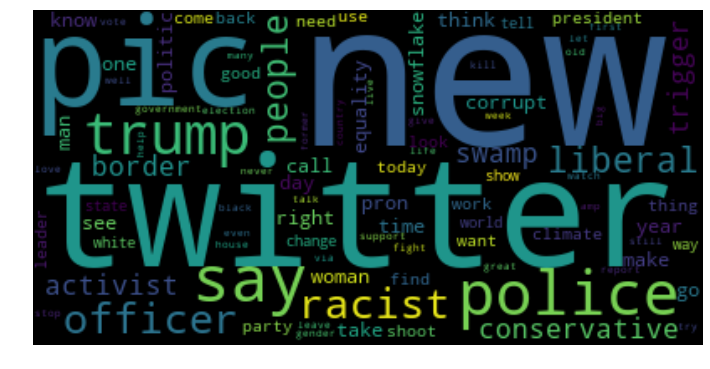

<Figure size 432x288 with 0 Axes>

In [166]:
text = X_train.lemmatized_tweets[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(words_text)

plt.figure(figsize=(12,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('word_count_cloud.png')


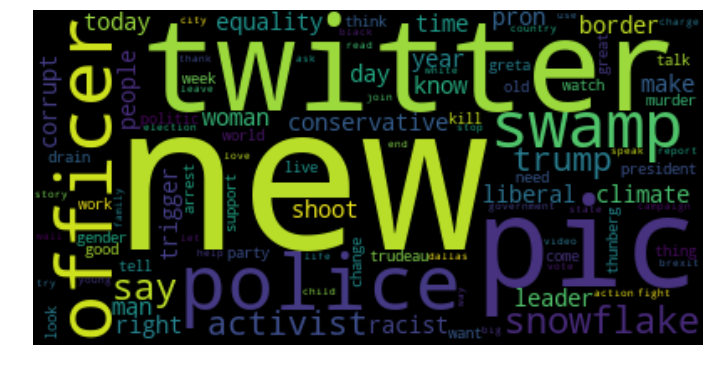

<Figure size 432x288 with 0 Axes>

In [167]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(svd_words_text)

plt.figure(figsize=(12,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('svd_cloud.png')